<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/main/task1yearaveragedcorrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 96.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 110.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 95.9 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-non

In [4]:
!earthengine authenticate


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=FbpgYnYWkGkNS8ZjsYzMOyH6oc_5C7Ut4IMWLFawTbo&tc=VJNAJXcw7-DPxSbu5ICQU0PtFDTuAwT1JNc9RDS-QSI&cc=KtNI5X1JoNMyMktYlZdBlx2OGuAKo3luvwa6kFiU3s0

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VODnpMOEeRc-_m9zscpI8r4CUy30b7vcDX3RwSbtRQ0CnL4gs41sVI

Successfully saved authorization token.


In [8]:
!pip install pycrs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pycrs: filename=PyCRS-1.0.2-py3-none-any.whl size=32686 sha256=b4c66bed67a65b19b48f01dbe9a4c0accb46a03101035381e0c481c49957a404
  Stored in directory: /root/.cache/pip/wheels/47/1d/70/7a5bdf33347e7c75e95b06b1fa38f076a59a9506653cc24aff
Successfully built pycrs


In [19]:
!pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 116.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 123.5 MB/s eta 0:00:00


In [25]:
import ee
import geopandas as gpd
from shapely.geometry import shape

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Load the shapefile using geopandas
shapefile_path = '/content/assignment-polygon.shp'
gdf = gpd.read_file(shapefile_path)

# Convert the geopandas GeoDataFrame to a Shapely geometry
study_area_geometry = gdf.geometry.values[0]
study_area = ee.Geometry.Polygon(list(shape(study_area_geometry).exterior.coords))

# Define the Earth Engine image collection
image_collection = ee.ImageCollection('ECMWF/ERA5_LAND/MONTHLY')

# Define the variables and time window
variables = ['temperature_2m', 'total_precipitation']
start_date = '2010-01-01'
end_date = '2010-12-31'

# Filter the image collection based on variables and time window
filtered_collection = image_collection.filterDate(start_date, end_date).select(variables)

# Export the images in the collection
image_count = filtered_collection.size().getInfo()
print("Total number of images:", image_count)

for i in range(image_count):
    image = ee.Image(filtered_collection.toList(image_count).get(i))
    image_id = image.id().getInfo()
    output_path = 'path_to_output_directory/{}.tif'.format(image_id)

    # Export the image with clipping to the study area
    task = ee.batch.Export.image.toDrive(
        image=image,
        description='Exporting {}'.format(image_id),
        fileNamePrefix=output_path,
        region=study_area,
        scale=1000,  # Adjust the scale value as per your requirement
    )
    task.start()
    print("Exporting {}/{}: {}".format(i + 1, image_count, output_path))


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=AkJMhojykm2Bh7RU8XD08aS-YmjnIWgi8OSVI25J9fc&tc=QwCFjvLVpCtJaVxFuK6xpVMuPorHBRDamQYGP9HHUPc&cc=psIk8JBXt36ABbJRSf3_yetTXXde0zUMT_CEmKy3VPk

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VPeDWFTbS4gadp3WoglXm3WmvjYdHXEYNx2piGy5QWAv2cHw1irJQc

Successfully saved authorization token.
Total number of images: 12
Exporting 1/12: path_to_output_directory/201001.tif
Exporting 2/12: path_to_output_directory/201002.tif
Exporting 3/12: path_to_output_directory/201003.tif
Exporting 4/12: path_to_output_directory/201004.tif
Exporting 5/12: path_to_output

In [27]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 94.3 MB/s eta 0:00:00


In [32]:
import os
import rasterio
import numpy as np

# List of TIFF files for each month
tiff_files = [
    '/content/path_to_output_directory_201001.tif.tif',
    '/content/path_to_output_directory_201002.tif.tif',
    '/content/path_to_output_directory_201003.tif.tif',
    '/content/path_to_output_directory_201004.tif.tif',
    '/content/path_to_output_directory_201005.tif.tif',
    '/content/path_to_output_directory_201006.tif.tif',
    '/content/path_to_output_directory_201007.tif.tif',
    '/content/path_to_output_directory_201008.tif.tif',
    '/content/path_to_output_directory_201009.tif.tif',
    '/content/path_to_output_directory_201010.tif.tif',
    '/content/path_to_output_directory_201011.tif.tif',
    '/content/path_to_output_directory_201012.tif.tif'
]

# Create the output directory if it doesn't exist
output_dir = 'path_to_output_directory'
os.makedirs(output_dir, exist_ok=True)

# Read and stack all TIFF files into a single array
stacked_images = []
for tiff_file in tiff_files:
    with rasterio.open(tiff_file) as dataset:
        image = dataset.read(1)
        stacked_images.append(image)

stacked_images = np.stack(stacked_images)

# Calculate the average along the stack axis (axis=0)
average_image = np.mean(stacked_images, axis=0)

# Save the average image as a TIFF file
output_file = os.path.join(output_dir, 'average_2010.tif')
with rasterio.open(output_file, 'w', driver='GTiff', width=average_image.shape[1],
                   height=average_image.shape[0], count=1, dtype=average_image.dtype,
                   crs=dataset.crs, transform=dataset.transform) as dst:
    dst.write(average_image, 1)


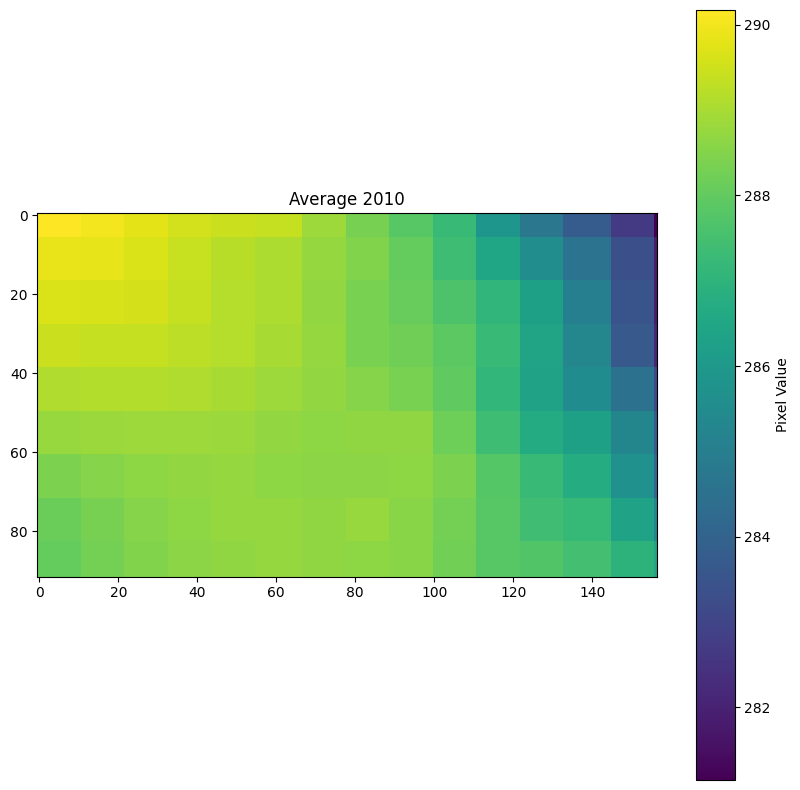

In [34]:
import rasterio
import matplotlib.pyplot as plt

# Read the average_2010.tif file
file_path = '/content/path_to_output_directory/average_2010.tif'
with rasterio.open(file_path) as dataset:
    image = dataset.read(1)

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='viridis')
plt.colorbar(label='Pixel Value')
plt.title('Average 2010')
plt.show()


In [35]:
import rasterio
import numpy as np
import pandas as pd

# Read the average_2010.tif file
file_path = 'path_to_output_directory/average_2010.tif'
with rasterio.open(file_path) as dataset:
    # Read the image as a NumPy array
    image = dataset.read(1)

# Convert the NumPy array to a DataFrame
df = pd.DataFrame(image)

# Print the DataFrame
print(df)


           0           1           2           3           4           5    \
0   290.173889  290.173889  290.173889  290.173889  290.173889  290.173889   
1   290.173889  290.173889  290.173889  290.173889  290.173889  290.173889   
2   290.173889  290.173889  290.173889  290.173889  290.173889  290.173889   
3   290.173889  290.173889  290.173889  290.173889  290.173889  290.173889   
4   290.173889  290.173889  290.173889  290.173889  290.173889  290.173889   
..         ...         ...         ...         ...         ...         ...   
87  288.025614  288.025614  288.025614  288.025614  288.025614  288.025614   
88  288.025614  288.025614  288.025614  288.025614  288.025614  288.025614   
89  288.025614  288.025614  288.025614  288.025614  288.025614  288.025614   
90  288.025614  288.025614  288.025614  288.025614  288.025614  288.025614   
91  288.025614  288.025614  288.025614  288.025614  288.025614  288.025614   

           6           7           8           9    ...        

In [37]:
import os
import rasterio
import numpy as np

# List of TIFF files for each month
tiff_files = [
    '/content/path_to_output_directory_201001.tif.tif',
    '/content/path_to_output_directory_201002.tif.tif',
    '/content/path_to_output_directory_201003.tif.tif',
    '/content/path_to_output_directory_201004.tif.tif',
    '/content/path_to_output_directory_201005.tif.tif',
    '/content/path_to_output_directory_201006.tif.tif',
    '/content/path_to_output_directory_201007.tif.tif',
    '/content/path_to_output_directory_201008.tif.tif',
    '/content/path_to_output_directory_201009.tif.tif',
    '/content/path_to_output_directory_201010.tif.tif',
    '/content/path_to_output_directory_201011.tif.tif',
    '/content/path_to_output_directory_201012.tif.tif'
]

# Create empty arrays to store the accumulated temperature and precipitation values
accumulated_temperature = None
accumulated_precipitation = None

# Iterate through the TIFF files
for tiff_file in tiff_files:
    with rasterio.open(tiff_file) as dataset:
        # Read the temperature and precipitation images
        temperature_image = dataset.read(1)
        precipitation_image = dataset.read(2)

        # Accumulate the values
        if accumulated_temperature is None:
            accumulated_temperature = temperature_image
        else:
            accumulated_temperature += temperature_image

        if accumulated_precipitation is None:
            accumulated_precipitation = precipitation_image
        else:
            accumulated_precipitation += precipitation_image

# Calculate the average temperature and precipitation values
average_temperature = accumulated_temperature / len(tiff_files)
average_precipitation = accumulated_precipitation / len(tiff_files)

# Convert average temperature and precipitation arrays to DataFrames
df_temperature = pd.DataFrame(average_temperature)
df_precipitation = pd.DataFrame(average_precipitation)

# Save DataFrames to CSV files
output_dir = 'path_to_output_directory'
df_temperature.to_csv(os.path.join(output_dir, 'average_temperature.csv'), index=False)
df_precipitation.to_csv(os.path.join(output_dir, 'average_precipitation.csv'), index=False)
